# Exercise 2
## Linear regression: bias of empirical risk
### G. Bontempi



## Question

Let us consider the dependency where the conditional distribution of ${\mathbf y}$ is
$$
{\mathbf y}= 1-x+x^2-x^3+{\mathbf w}
$$
where ${\mathbf w}\sim N(0,\sigma^2)$, $x \in \Re$
takes the values ${\tt seq(-1,1,length.out=N)}$ (with $N=50$) 
and $\sigma=0.5$.

Consider the family of regression models
$$h^{(m)}(x)=\beta_0 +\sum_{j=1}^m \beta_j x^j$$
where $p$ denote the number of weights of the polynomial model $h^{(m)}$ of degree $m$.

Let $\widehat{\text{MISE}}_{\text{emp}}^{(m)}$ denote the least-squares empirical risk
and MISE the mean integrated empirical risk. We make the assumption
that a Monte Carlo simulation with $S=10000$ repetitions returns an
accurate computation of the expectation terms (notably the MISE term).

By using Monte Carlo simulation (with $S=10000$ repetitions) and for $m=0,\dots,6$

*  plot
$E[\widehat{\textbf{MISE}}_{\text{emp}}^{(m)}]$ as a function of $p$,
* plot $\text{MISE}^{(m)}$ as a function of $p$,
* plot the difference $E[\widehat{\textbf{MISE}}_{\text{emp}}^{(m)}]-\text{MISE}^{(m)}$ 
as a function of $p$ and compare it with the theoretical result seen during the class.

For a single observed dataset:

* plot
$\widehat{\text{MISE}}_{\text{emp}}^{(m)}$ as a function of the number of model parameters $p$,
* plot PSE as a function of $p$,
* discuss the relation between $\arg \min_m \widehat{\text{MISE}}_{\text{emp}}^{(m)}$ and $\arg \min_m \text{PSE}^{(m)}$


NOTA BENE: the use of the R command $\texttt{lm}$ is NOT allowed.

\pagebreak

## Monte Carlo Simulation


In [1]:


import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 50

# Number of Monte Carlo trials
S = 10000

# Maximum order of the polynomial model
M = 6

# Standard deviation of noise
sdw = 0.5

# Initialize Emp and MISE arrays
Emp = np.empty((M + 1, S))
MISE = np.empty((M + 1, S))

for s in range(S):
    X = np.linspace(-1, 1, N)
    Y = 1 - X + X**2 - X**3 + np.random.normal(scale=sdw, size=N)
    
    Xts = X
    Yts = 1 - Xts + Xts**2 - Xts**3 + np.random.normal(scale=sdw, size=N)
    
    for m in range(M + 1):
        DX = np.column_stack([X**j for j in range(m + 1)])
        
        betahat = np.linalg.inv(DX.T @ DX) @ DX.T @ Y
        Yhat = DX @ betahat
        Emp[m, s] = np.mean((Y - Yhat)**2)
        MISE[m, s] = np.mean((Yts - Yhat)**2)

mMISE = np.mean(MISE, axis=1)
mEmp = np.mean(Emp, axis=1)



### Plot expected empirical risk and MISE

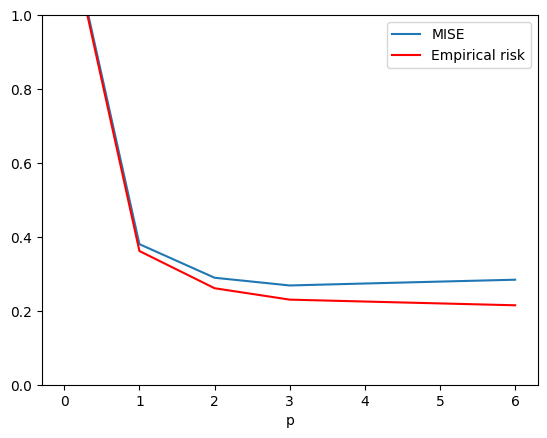

In [2]:

plt.figure()
plt.plot(mMISE, label='MISE')
plt.ylim(0, 1)
plt.xlabel('p')
plt.plot(mEmp, color='red', label='Empirical risk')
plt.legend(loc='upper right')
plt.show()



### Plot bias of empirical risk vs theoretical quantity

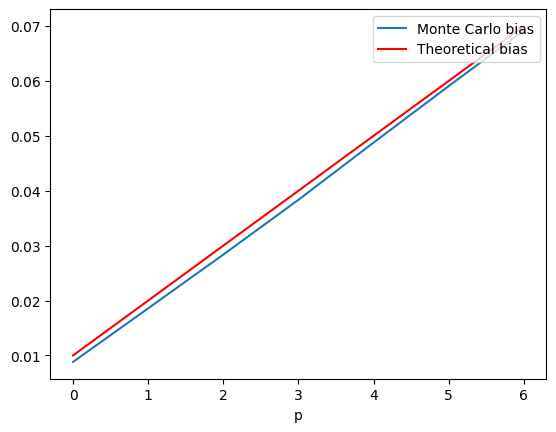

In [3]:
plt.figure()
plt.plot(mMISE - mEmp, label='Monte Carlo bias')
p = np.arange(1, M + 2)
plt.plot(2 * p * sdw**2 / N, color='red', label='Theoretical bias')
plt.xlabel('p')
plt.legend(loc='upper right')
plt.show()

## Single dataset

bestEmp= 6 bestPSE= 3


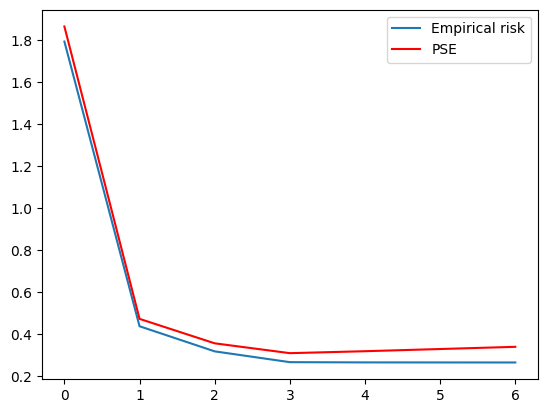

In [5]:

# Set seed for reproducibility
np.random.seed(0)

# Number of samples
N = 50

# Maximum order of the polynomial model
M = 6

# Standard deviation of noise
sdw = 0.5

Emp = np.empty(M + 1)
PSE = np.empty(M + 1)

X = np.linspace(-1, 1, N)
Y = 1 - X + X**2 - X**3 + np.random.normal(scale=sdw, size=N)

for m in range(M + 1):
    DX = np.column_stack([X**j for j in range(m + 1)])
    
    betahat = np.linalg.inv(DX.T @ DX) @ DX.T @ Y
    Yhat = DX @ betahat
    Emp[m] = np.mean((Y - Yhat)**2)
    sdw_est = np.std(Y - Yhat)
    PSE[m] = Emp[m] + 2 * sdw_est**2 / N * (m + 1)

bestEmp = np.argmin(Emp)
bestPSE = np.argmin(PSE)

print('bestEmp=', bestEmp, 'bestPSE=', bestPSE)

plt.figure()
plt.plot(Emp, label='Empirical risk')
plt.plot(PSE, color='red', label='PSE')
plt.legend(loc='upper right')
plt.show()


The  model degree _bestEmp_ returned by minimizing the empirical risk corresponds to the
highest order considered.

The  model degree _bestPSE_ returned by minimizing the PSE corresponds to the real degree of the regression function $E[{\mathbf y}| x]$.